# MSE 211 MDP Project

We can do the project here

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# of iterations: 9


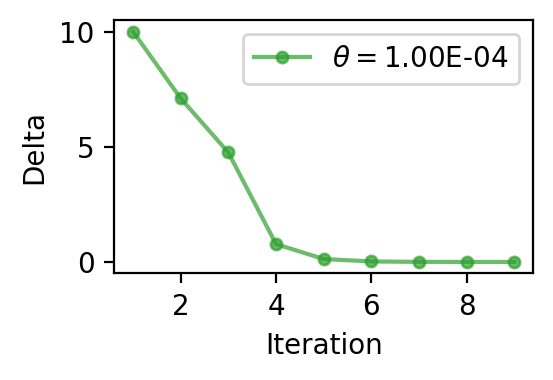

In [138]:
# Classic VI

actions = (0, 1)
states = (0, 1, 2, 3, 4)
rewards = [-1, -1, 10, -1, -1]
gamma = 0.9
probs = [
    [[0.9, 0.1], [0.1, 0.9], [0, 0], [0, 0], [0, 0]],
    [[0.9, 0.1], [0, 0], [0.1, 0.9], [0, 0], [0, 0]],
    [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
    [[0, 0], [0, 0], [0.9, 0.1], [0, 0], [0.1, 0.9]],
    [[0, 0], [0, 0], [0, 0], [0.9, 0.1], [0.1, 0.9]],
]
V = [0, 0, 0, 0, 0]

def classic_value_iteration(states, actions, rewards, probs, V):
    policy = [None, None, None, None, None]
    delta = 0
    for s in states:
        max_val = 0
        v = V[s]
        for a in actions:
            val = rewards[s]
            for s_next in states:
                val += probs[s][s_next][a] * (gamma * V[s_next])
            max_val = max(max_val, val)
            # if V[s] < val:
            #     policy[s] = actions[a]
        V[s] = max_val
        delta = max(delta, abs(v - V[s]))
    return delta

def simulate(max_iter, theta):
    res = []
    iter = 0
    while iter < max_iter:
        delta = classic_value_iteration(states, actions, rewards, probs, V)
        res.append(delta)
        if delta < theta:
            break
        iter += 1
    return res

theta = 1e-4
res = simulate(10000, theta)

print(f'# of iterations: {len(res)}')
fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
ax.plot(np.arange(len(res)) + 1, res, marker='o', markersize=4,
        alpha=0.7, color='#2ca02c', label=r'$\theta= $' + "{:.2E}".format(theta))
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.legend()
plt.tight_layout()
plt.show()

In [15]:
# Q5: Tic-tac-toe

class TicTacToe:
    def __init__(self):
        # init the board
        self.board = [['-'] * 3 for _ in range(3)]
        self.is_over = False
        self.remaining_pos = {(i, j) for i in range(3) for j in range(3)}

    def __str__(self):
        s = ""
        size = len(self.board)
        for row in range(size):
            for col in range(size):
                s += self.board[row][col]
                if col == 2:
                    s += "\n"
        return s

    def mark(self, player, i, j):
        if self.is_over:
            raise Exception("Game is over.")
        if i < 0 or j < 0 or i > 2 or j > 2:
            raise Exception(f"({i}, {j}) is out of boundary.")
        if self.board[i][j] != '-':
            raise Exception(f"({i}, {j}) is taken.")

        self.board[i][j] = player.mark
        self.remaining_pos.remove((i, j))
        if self._is_over(player, i, j):
            return f"Game over. Winer is {player}."

        if len(self.remaining_pos) <= 0:
            return "Tie."

        return "Game is not over. Continue."

    def _is_over(self, player, i, j):
        # horizontally
        is_over = True
        for k in range(3):
            is_over &= self.board[k][j] == player.mark        

        # vertically
        is_over = True
        for k in range(3):
            is_over &= self.board[i][k] == player.mark
        
        # diagonally
        if i == j:
            is_over = True
            for k in range(3):
                is_over &= self.board[k][k] == player.mark

        diagonal = ((0, 2), (1, 1), (2, 0))
        if (i, j) in diagonal:
            is_over = True
            for k in diagonal:
                is_over &= self.board[k[0]][k[1]] == player.mark

        self.is_over = is_over
        return is_over        

class Player:
    def __init__(self, name, mark):
        self.name = name
        self.mark = mark

    def __str__(self):
        return f"Player {self.name}"


In [16]:
b = TicTacToe()
p1 = Player(1, "O")
p2 = Player(2, "X")

b.mark(p1, 1, 1)
b.mark(p2, 0, 1)
b.mark(p1, 0, 0)
b.mark(p2, 2, 1)
print(b.mark(p1, 2, 2))
print(b)

Game over. Winer is Player 1.
OX-
-O-
-XO



In [4]:
import itertools
class GridWorld:

    def __init__(self, n):
        """ Make a grid of size n"""
        self.n = n
        self.states = list(itertools.product(list(range(self.n)), list(range(self.n))))
        self._actions = {}

    def actions(self, state):
        if state in self._actions:
            return self._actions[state]
        
        x, y = state
        action_set = []

        if x - 1 >= 0:
            action_set.append("LEFT")
        if x + 1 < self.n:
            action_set.append("RIGHT")
        if y - 1 >= 0:
            action_set.append("UP")
        if y + 1 < self.n:
            action_set.append("DOWN")
            

        self._actions[state] = action_set
        
        return action_set

    def transition(self, state, action):
        """
        List of tuples with states and probability of transitioning to 
        given state
        """
        x, y = state
        if action == "LEFT":
            return [((x - 1, y), 1.0)]
        if action == "RIGHT":
            return [((x + 1, y), 1.0)]
        if action == "UP":
            return [((x, y - 1), 1.0)]
        if action == "DOWN":
            return [((x, y + 1), 1.0)]

    def reward(self, state, action):
        x, y = state
        if x == 0 and y == self.n - 1:
            return 1
        else:
            return 0
        

    def prob(self, state, action):
        actions = self.actions(state)
        return { action: 1 / len(actions) for action in actions }
        
        #return 1 / len(actions)    

In [19]:
import random
from enum import Enum
from abc import ABC, abstractmethod, abstractproperty
import copy
# States
# Actions

# States 
# Actions
# Rewards
class UpdateRule(Enum):
    DURING_SWEEP = "DURING SWEEP"
    AFTER_SWEEP = "AFTER SWEEP"

class ValueIterator(ABC):
    def __init__(self):
        pass

    @abstractmethod
    def get_states(self, states, **kwargs):
        pass

    @abstractproperty
    def update_rule(self):
        pass

    @property
    def name(self):
        return type(self).__name__

    
    def iterate(self, mdp, gamma, V_0):
        V = V_0
        V_copy = None if self.update_rule != UpdateRule.AFTER_SWEEP else copy.deepcopy(V_0)
        
        # If update during sweep, use the same v
        # If not updating during sweep, store and update later
        
        for state in self.get_states(mdp.states):
            costs = []
            for action in mdp.actions(state):
                # Immediate reward
                state_action_cost = mdp.reward(state, action)
                for (next_state, p) in mdp.transition(state, action):
                    # Values based on next states
                    state_action_cost += gamma * p * V[next_state]

                costs.append(state_action_cost)
                

            new_cost = max(costs)
            
            if self.update_rule == UpdateRule.DURING_SWEEP:
                V[state] = new_cost
                
            elif self.update_rule == UpdateRule.AFTER_SWEEP:
                V_copy[state] = new_cost

        # Return values at the end
        if self.update_rule == UpdateRule.AFTER_SWEEP:
            return V_copy
        elif self.update_rule == UpdateRule.DURING_SWEEP:
            return V



class ClassicVI(ValueIterator):
    def get_states(self, states, **kwargs):
        return states

    @property
    def update_rule(self):
        return UpdateRule.AFTER_SWEEP

class RandomVI(ValueIterator):
    def __init__(self, k):
        super().__init__()
        self.k = k
    
    def get_states(self, states, **kwargs):
        return random.sample(states, self.k)

    @property
    def update_rule(self):
        return UpdateRule.AFTER_SWEEP

    @property
    def name(self):
        return "{} (k={})".format(type(self).__name__, self.k)

class CyclicVI(ValueIterator):
    def get_states(self, states, **kwargs):
        return states

    @property
    def update_rule(self):
        return UpdateRule.DURING_SWEEP

class RandomCyclicVI(ValueIterator):
    def get_states(self, states, **kwargs):
        return random.sample(states)

    @property
    def update_rule(self):
        return UpdateRule.DURING_SWEEP


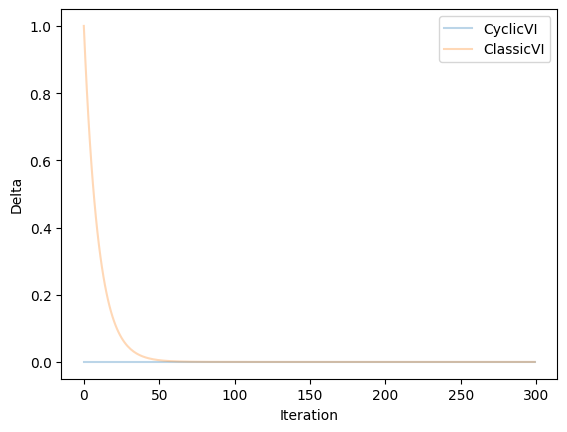

In [48]:
class Solver:
    def __init__(self, iterator, mdp, gamma):
        self.iterator = iterator
        self.mdp = mdp
        self.gamma = gamma
        self.solution = None
        self.deltas = None

    def solve(self, steps=100):
        V = { state: 0 for state in self.mdp.states}
        deltas = []
        for i in range(steps):
            V_new = self.iterator.iterate(self.mdp, self.gamma, V)
            
            # Calculate the delta by seeing the biggest change between the two versions
            delta = max([abs(V_new[state] - V[state]) for state in V])
            deltas.append(delta)

            V = V_new

        self.solution = V
        self.deltas = deltas


    def plot_delta(self):
        deltas = self.deltas
        if deltas is not None:
            label = self.iterator.name
            plt.plot(deltas, label=label, alpha=0.3)
            plt.xlabel("Iteration")
            plt.ylabel("Delta")

g = GridWorld(5)

iterators = [CyclicVI(), ClassicVI()]#[RandomVI(k=k) for k in range(1, 26, 5)]

for iterator in iterators:
    solver = Solver(iterator, g, 0.9)
    solver.solve(steps = 300)
    solver.plot_delta()
    
plt.legend()
plt.show()


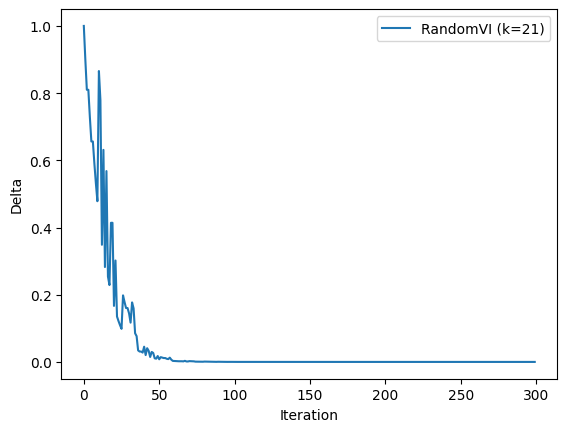

In [40]:
solver.plot_delta()
plt.legend()

In [12]:
type(iterator).__name__

'ClassicVI'

In [57]:
"""
MDPSolver:

Model/MDP
Iteration Method

Iterate until end

"""

"""
Iteration method:
Classic VI,
Random VI
Cyclic VI,
Random Cyclic VI

All iteration methods:
Take states, actions, rewards, gamma, initial values

Ouptuts
new values vector for each state
"""


"""class MDP:


    def iterate(self):
        # Get stored values
        for state in self.states:
            
            vals = []
            for action in state.actions:
                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)
                vals.append(value_cost)

            value[state] = max(vals)
        # Update all values after state is stored


    def iterate_random_VI(self, k):
        states = random.sample(self.states, k)

        for state in self.states:
            vals = []
            for action in state.actions:
                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)
                vals.append(value_cost)

            value[state] = max(vals)
        # Update all values after state is stored


    def iterate_cyclic_VI(self):
        # Get stored values
        for state in self.states:
            
            vals = []
            for action in state.actions:
                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)
                vals.append(value_cost)

            # Update stored values
            value[state] = max(vals)


    def iterate_cyclic_VI_random(self):
        # Get stored values
        for state in random.sample(self.states):
            
            vals = []
            for action in state.actions:
                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)
                vals.append(value_cost)

            # Update stored values
            value[state] = max(vals)


"""

'class MDP:\n\n\n    def iterate(self):\n        # Get stored values\n        for state in self.states:\n            \n            vals = []\n            for action in state.actions:\n                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)\n                vals.append(value_cost)\n\n            value[state] = max(vals)\n        # Update all values after state is stored\n\n\n    def iterate_random_VI(self, k):\n        states = random.sample(self.states, k)\n\n        for state in self.states:\n            vals = []\n            for action in state.actions:\n                value_cost = reward(state, action) + self.gamma * self.prob * value(state, action)\n                vals.append(value_cost)\n\n            value[state] = max(vals)\n        # Update all values after state is stored\n\n\n    def iterate_cyclic_VI(self):\n        # Get stored values\n        for state in self.states:\n            \n            vals = []\n            for action

In [ ]:
class MDP(ABC):
    def __init__(self, states):
        self.states = states

    @abstractmethod
    def prob(self, s, a):
        pass

    @abstractmethod
    def reward(self, s, a):
        pass

    @abc.abstractproperty
    def states(self):
        pass

